In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV files
file1 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max5/MvSR_results.csv')
file2 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max9/MvSR_results.csv')
file3 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max15/MvSR_results.csv')
file4 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max25/MvSR_results.csv')

# Combine into a single DataFrame for ease of processing
df = pd.concat([file1, file2, file3, file4], ignore_index=True)
df = df.drop_duplicates(subset=['expression'])

# Function to parse the losses
def parse_losses(losses):
    return list(map(float, losses.strip('[]').split(',')))

# Apply parsing to the losses column
df['losses'] = df['losses'].apply(parse_losses)

# Calculate summary statistics
summary_stats = df['losses'].apply(lambda x: pd.Series({
    'mean': np.mean(x),
    'median': np.median(x),
    'std_dev': np.std(x)
}))

# Add the summary statistics to the original DataFrame
df = pd.concat([df, summary_stats], axis=1)

df['DoF'] = df['expression'].str.count(r'[A-Z]')




In [16]:
df.sort_values(by='mean')
#print(df_sorted['expression'][:5])

,expression,losses,mean,median,std_dev,DoF
338,-A*X1 - B*X2 - C*(D*X2 + E)/(F*X2 + G*exp(-H*X...,"[0.036481119813586094, 0.0030789046580705134, ...",0.011135,0.002892,0.027500,16
227,A*(-B*X1 + C*X2 + D)*(-E*X1**2 - F*X1 + G) + H,"[0.04072543874517744, 0.004438397161788395, 0....",0.014384,0.003089,0.033573,12
232,-A*X1**0.5 + B*X1 - C*X2 - D*(-E*X2 - F)*exp(-...,"[0.01528388440983059, 0.0028231072768221278, 0...",0.015735,0.009741,0.016294,13
202,-A*X1 - B*X2**2 + C*X2 + D + E/X1,"[0.016261756810378322, 0.002941396371789716, 0...",0.017758,0.009053,0.022937,9
334,A*(B - C*X1)*(-D*X1 + E*exp(-F*X1 + G*X2) - H)...,"[0.040886521727406075, 0.003571833557785822, 0...",0.020419,0.014516,0.028941,13
...,...,...,...,...,...,...
286,A*X1**0.5 - B*X1 + C*X2 + D*log(E*X1) - F,"[0.2467298632432857, 6.278784136368389, 0.4303...",2.267015,0.431539,5.647626,10
354,-A*X2**2 + B*X2 + C*(-D*X1 - E)*log(F*X1) + G,"[12.941460110817667, 0.002307985639235115, 8.1...",3.487529,0.019177,6.848233,11
257,-A*X1 + B*X2 + C*log(D*X1) + E*log(F*X1) + G,"[0.28321887317128375, 5.65548602400711, 0.4304...",4.078954,0.431814,8.247420,11
345,-A*(-B*X1 - C*X2)*(-D*X2 - E) + F*(G*X2 + H)*l...,"[0.021993620616038916, 10.173190334564916, 0.0...",5.712948,0.043557,11.307713,15


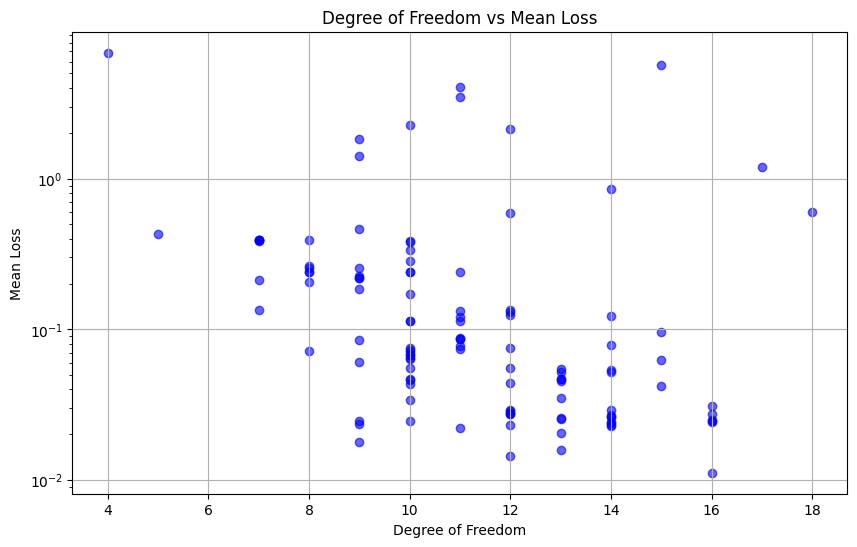

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DoF'], df['mean'], color='blue', alpha=0.6)
plt.title('Degree of Freedom vs Mean Loss')
plt.xlabel('Degree of Freedom')
plt.ylabel('Mean Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

In [23]:
def is_pareto_efficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        is_efficient[i] = not np.any(np.all(costs <= c, axis=1) & np.any(costs < c, axis=1))
    return is_efficient

# Convert loss arrays to numpy array for processing
loss_array = np.array(df["losses"].tolist())

# Identify Pareto optimal points
pareto_mask = is_pareto_efficient(loss_array)
pareto_df = df[pareto_mask]

In [19]:
pareto_df.sort_values(by='mean')

,expression,losses,mean,median,std_dev,DoF
338,-A*X1 - B*X2 - C*(D*X2 + E)/(F*X2 + G*exp(-H*X...,"[0.036481119813586094, 0.0030789046580705134, ...",0.011135,0.002892,0.027500,16
227,A*(-B*X1 + C*X2 + D)*(-E*X1**2 - F*X1 + G) + H,"[0.04072543874517744, 0.004438397161788395, 0....",0.014384,0.003089,0.033573,12
232,-A*X1**0.5 + B*X1 - C*X2 - D*(-E*X2 - F)*exp(-...,"[0.01528388440983059, 0.0028231072768221278, 0...",0.015735,0.009741,0.016294,13
202,-A*X1 - B*X2**2 + C*X2 + D + E/X1,"[0.016261756810378322, 0.002941396371789716, 0...",0.017758,0.009053,0.022937,9
334,A*(B - C*X1)*(-D*X1 + E*exp(-F*X1 + G*X2) - H)...,"[0.040886521727406075, 0.003571833557785822, 0...",0.020419,0.014516,0.028941,13
...,...,...,...,...,...,...
389,-A*X1 + B*(C*X2 + D)/log(E*X1) - F,"[0.0443276837239173, 0.09739161726076269, 0.00...",0.463598,0.022617,1.830420,9
353,A*(-B*X2 + C*(D*X1 + E*X2 + F)**2)*(G*X2 - exp...,"[7.1258057913646375, 7.084594098503977, 0.0033...",0.601638,0.005334,1.786653,18
262,A*X1 + B*X2 + C*(-D*X2 - E)*log(F*X1) + G - H*...,"[0.029990888770170088, 0.03016169269665133, 0....",0.848597,0.005710,3.549865,14
357,-A*X1*(B*X2 + C) + D*X1 + E*X2 - F*(exp(-G*X1 ...,"[0.17766365383768837, 0.003684088078521979, 0....",1.204048,0.006807,3.943401,17


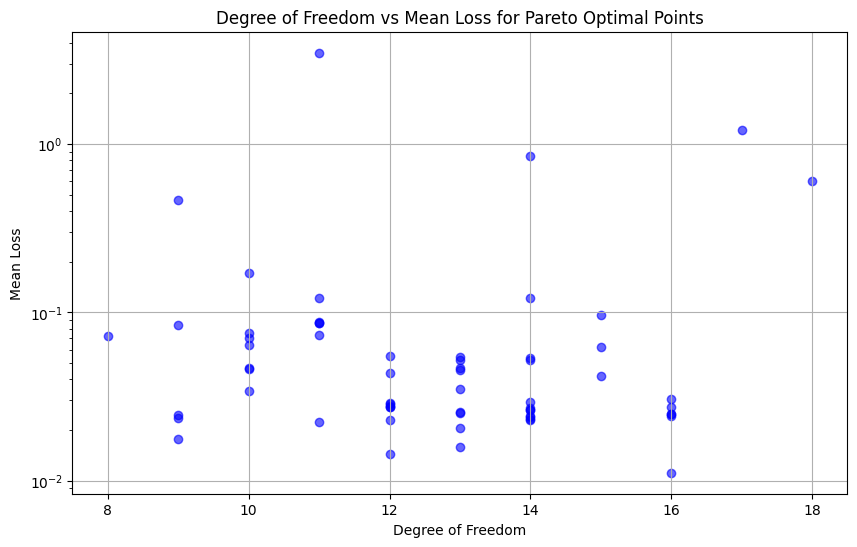

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(pareto_df['DoF'], pareto_df['mean'], color='blue', alpha=0.6)
plt.title('Degree of Freedom vs Mean Loss for Pareto Optimal Points')
plt.xlabel('Degree of Freedom')
plt.ylabel('Mean Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

In [28]:
sorted = pareto_df.drop(columns=['losses']).sort_values(by='mean').head(10)
print(3)

KeyboardInterrupt: 

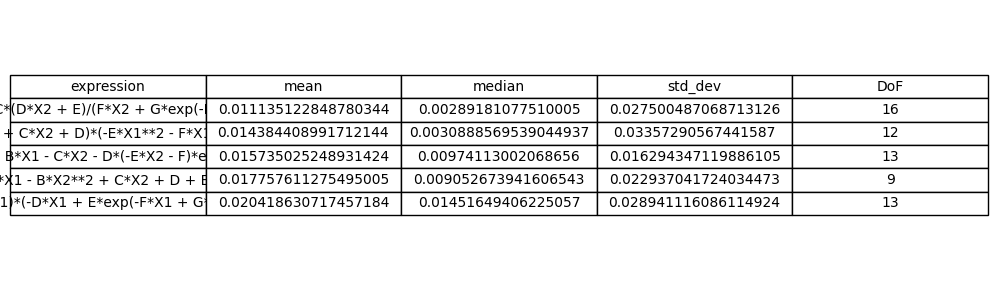

In [21]:
pareto_df = pareto_df.drop(columns=['losses']).sort_values(by='mean').head(5)

# Convert first 5 rows to a PNG
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=pareto_df.values, colLabels=pareto_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(3)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig("/home/anava/projects/MvSR-analysis/pareto_optimal_expressions.png", dpi=300)


Processing PySR results unfortunately the losses here are not comparable since the objective is different. 

In [4]:
import pickle
import numpy as np

file_path = '/home/anava/projects/symbolic_regression_examples/data/plots/May21/Classification/single_paths_fit_results_classification_2D_90.pkl'

with open(file_path, 'rb') as file:
    results = pickle.load(file)

loss_values = [result["loss"] for result in results.values()]
eqs = [result["best_equation"] for result in results.values()]

# Compute the mean and standard deviation of the loss values
mean_loss = np.mean(loss_values)
std_loss = np.std(loss_values)

mean_loss, np.median(loss_values),std_loss, loss_values, eqs


(0.0021553116111111114,
 0.0,
 0.004182971595257863,
 [0.0, 0.013437208, 0.0, 0.0, 0.0, 0.0022872393, 0.0, 0.0, 0.0036733572],
 [242.628379649554*x1 - 227.011773833277 + 14979.5999759348*(x0 - 0.26698738)**3/x1**3,
  x1/x0 + (-6.021569*x0 + x1 + 0.7402675)/x0**3,
  (-20.685160478315*x1**3 + 0.558204916580221 + (x1 + (-201.454558324859*x0**3 + x0)/x1)/x0**3)/x0**3,
  29.3066830080731*x1**3*(x0 - 0.9432029)/(x0 - 0.31483057)**3 + 771.696283183661,
  (-2.96381899549674 + (2351.35620027071*(-x0 + 0.22769950860169*x1 + 0.0720680295544854)**3 + 1.05068817053727 + 0.09090107/x0)/x0**3)/x0,
  (x1 + 0.7983441)**3*(-5.37285966846463*x1**3 - 0.9638828 + 3.05304236740477*(-6.190944 + (-5.23354670070034 + (x1 + 0.496474568711624)/x0)/x0)/x0),
  27.854998/(-79.29371*x0 + 27.854998*x1 + 32.99563),
  1.1722031/(-15.9086075286131*x0**3 + x1 + exp(-6.2686692724689*x0)),
  2.0609696*(2.92870280078506*x0 - 1.30462566870306*x1**3 + 1.55755044217815 + (-5.8336706*x0 + x1 + 0.7864427)/x0**2)/x0])

In [5]:
file_path = '/home/anava/projects/symbolic_regression_examples/data/plots/May21/Regression_and_Classification/single_paths_fit_results_reg_class_2D_90.pkl'

with open(file_path, 'rb') as file:
    results = pickle.load(file)

loss_values = [result["loss"] for result in results.values()]
eqs = [result["best_equation"] for result in results.values()]

# Compute the mean and standard deviation of the loss values
mean_loss = np.mean(loss_values)
std_loss = np.std(loss_values)

mean_loss, np.median(loss_values),std_loss, loss_values, eqs

(2.6766334,
 1.9553103,
 1.8857843084668513,
 [2.3930392,
  5.875985,
  5.3630085,
  0.2741485,
  1.3435918,
  4.260455,
  1.6044999,
  1.9553103,
  1.0196624],
 [5063.38345042962*(-x0 + 0.308570356509847*x1)**3 + 113.186802437077 + 0.84548277/x1,
  5.394917 + (-6.0947337*x0 + x1 + 0.7417259)/x0**3,
  193.8701*x1 + 1.6108594 + (-2845.27870704361*x0**3 + exp(x1))*exp(x1)/(x0*x1),
  2.8291957 - 0.011979868*exp((x1 + 0.2188256)/x0**2)/(81.2794296925065*(-0.700456844101408*x0 + 0.230855265199141*x1 - 1)**3 + 150.22906),
  77.7498146250045*(x1 - 0.9053923)**3 - 442.621121146398 + 77.7498146250045*(x1 + 1.035857)/x0,
  (16.861387*x1 + 19.209743 + 39.146194/(log(x0) + 0.41270617))/x0**2,
  446398961.008032*(0.00725354864165173*x0*(2*x1 - 330.63164553) + 0.844393938955616*x1 + 1)**3 + 3.1245422,
  0.9138223 - 1.4090827*(228.802023762441*(-x1 + 0.703083559298956 + 0.163498352002011*(-5.3024464*x0 + x1 + 0.9699222)/x0**2)**3 + 0.9699222)/(x1 - 0.3523103)**3,
  -133.612294509008*x1**4 + 2.6919582

## COMPUTING Same FoM as in PySR multi regression for these derived expressions!
- For each expression, we will compoute the rmse between the implicit contour and the degeneracy path data. (lowmass 2D and 3D)

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import os

dim = "2D"
mass = "lowmass"

In [37]:
# load data used for fitting expressions
data_list = []
for file_num in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
    data_file = f"/home/anava/projects/symbolic_regression_examples/data/paths/{dim}/{mass}/{mass}_{file_num}.txt"
    data_list.append(np.loadtxt(data_file))
    
    
file_nums = [0, 1]
X1 = []
X2 = []
labels = []

for i in file_nums:
    data = data_list[i]

    X1.append(data[:, 0])
    X2.append(data[:, 1])

    if i == 0:
        labels.append(np.full(data[:, 1].shape, np.e))  # First set of labels are e
    else:
        labels.append(np.full(data[:, 1].shape, np.pi**2))  # Second set of labels are pi^2

X1 = np.concatenate(X1)
X2 = np.concatenate(X2)
labels = np.concatenate(labels)

In [38]:
import numpy as np
import sympy as sp
from scipy.optimize import curve_fit
import re

variables = sp.symbols('X1 X2')


function_mapping = {
    'exp': sp.exp,
    'log': sp.log,
    'sqrt': sp.sqrt,
    'cbrt': lambda x: x**(sp.S(1)/3)  # Cube root function
}

expr_string = "A*exp(X1) + B*X2 - C*exp(D*X1**2) - E*sqrt(X1) + F*exp(X2) + G*X1 + H*X2"

constants = sorted(set(re.findall(r'\b[A-Z]\b', expr_string)))

constants = sp.symbols(' '.join(constants))

expr = sp.sympify(expr_string, locals=function_mapping)

func = sp.lambdify((*variables, *constants), expr, 'numpy')

def objective(X, *params):
    x1, x2 = X
    return func(x1, x2, *params)

initial_guess = [0.1]*len(constants) 
params, params_covariance = curve_fit(objective, (X1, X2), labels, p0=initial_guess)

print("Fitted parameters:", params,func,expr)


Fitted parameters: [ 7.99561069e+01 -6.04271919e+01 -1.15434334e+02 -3.07081448e+02
  1.00000000e-01  6.11274166e-02 -6.60145171e+02  7.43161349e+01] <function _lambdifygenerated at 0x7ff7d2d06700> A*exp(X1) + B*X2 - C*exp(D*X1**2) + F*exp(X2) + G*X1 + H*X2 - E*sqrt(X1)


/tmp/ipykernel_500987/3188271041.py:31: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance = curve_fit(objective, (X1, X2), labels, p0=initial_guess)


/tmp/ipykernel_500987/2547788958.py:35: UserWarning: The following kwargs were not used by contour: 'label'
  contours = plt.contour(
/tmp/ipykernel_500987/2547788958.py:41: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_paths = contours.collections[0].get_paths()
/tmp/ipykernel_500987/2547788958.py:35: UserWarning: The following kwargs were not used by contour: 'label'
  contours = plt.contour(
/tmp/ipykernel_500987/2547788958.py:41: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_paths = contours.collections[0].get_paths()
/tmp/ipykernel_500987/2547788958.py:35: UserWarning: The following kwargs were not used by contour: 'label'
  contours = plt.contour(
/tmp/ipykernel_500987/2547788958.py:41: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be

RMSE between points and contour in y-direction: 0.0095
RMSE between points and contour in y-direction: 0.0085
RMSE between points and contour in y-direction: 0.0551
RMSE between points and contour in y-direction: 0.0849
RMSE between points and contour in y-direction: 0.0508
RMSE between points and contour in y-direction: 0.0219
RMSE between points and contour in y-direction: 0.0421
RMSE between points and contour in y-direction: 0.1869
RMSE between points and contour in y-direction: 0.1729
[0.009529485828413876, 0.008544992682116762, 0.05514093164753741, 0.08493036899503233, 0.05080414859022799, 0.02186352660379652, 0.04208311146115147, 0.18689433628697724, 0.17294326743239752] 0.07030379661418346


/tmp/ipykernel_500987/2547788958.py:35: UserWarning: The following kwargs were not used by contour: 'label'
  contours = plt.contour(
/tmp/ipykernel_500987/2547788958.py:41: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_paths = contours.collections[0].get_paths()
/tmp/ipykernel_500987/2547788958.py:35: UserWarning: The following kwargs were not used by contour: 'label'
  contours = plt.contour(
/tmp/ipykernel_500987/2547788958.py:41: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contour_paths = contours.collections[0].get_paths()


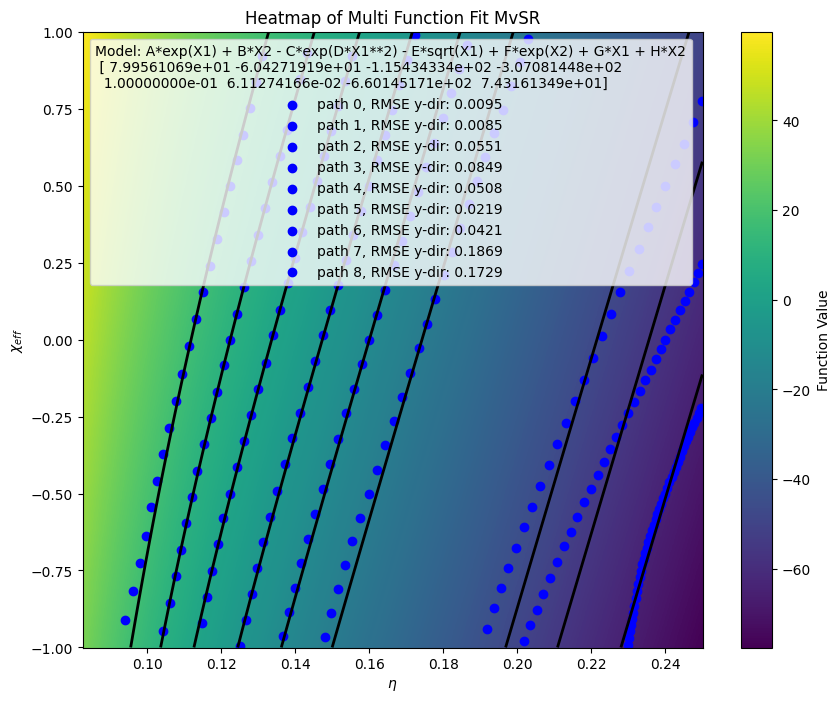

In [50]:
xlabel="$\eta$"
ylabel="$\chi_{eff}$"

predicted_labels = objective((X1, X2), *params) # we need to use this objective the same as we use model in the other thingy...
predicted_labels

# Compute contours and plot
plot_bounds=[[0.0826, 0.25], [-1, 1]]
grid_size = 1000
if plot_bounds == None:
    x_min, x_max = data_list[0][:, 0].min(), data_list[0][:, 0].max()
    y_min, y_max = data_list[0][:, 1].min(), data_list[0][:, 1].max()
else:
    x_min, x_max = plot_bounds[0]
    y_min, y_max = plot_bounds[1]
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))
grid = np.c_[xx.ravel(), yy.ravel()]

zz = objective((xx.ravel(), yy.ravel()), *params).reshape(xx.shape)

# zz = model.predict(grid).reshape(xx.shape)

rmse_list = []

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, zz, shading="auto", cmap="viridis")
plt.colorbar(label="Function Value")
for i, data in enumerate(data_list):

    # predictions = model.predict((data))
    predictions = objective((data[:, 0], data[:, 1]), *params)
    c_level = np.median(predictions[~np.isnan(predictions)])  # changed from mean for stability.

    # print(c_level, model.predict((data)))
    contours = plt.contour(
        xx, yy, zz, levels=[c_level], colors="k", linestyles="solid", linewidths=2, label="Contour"
    )

    # print("CONTOURS!!!!", contours, c_level, model.predict((data)))

    contour_paths = contours.collections[0].get_paths()
    contour_points = np.vstack([p.vertices for p in contour_paths])
    # print("contours ",contour_points, data[:, 1], len(contour_points),len(data[:,1]))

    errors = []
    for point in data:
        closest_contour_point = contour_points[np.argmin(np.abs(contour_points[:, 0] - point[0]))]
        y_distance_error = np.abs(closest_contour_point[1] - point[1])
        errors.append(y_distance_error)

    rmse = np.sqrt(mean_squared_error(np.zeros_like(errors), errors))
    rmse_list.append(rmse)
    print(f"RMSE between points and contour in y-direction: {rmse:.4f}")
    plt.scatter(data[:, 0], data[:, 1], c="blue", label=f"path {i}, RMSE y-dir: {rmse:.4f}")



plt.title(
    f"Heatmap of Multi Function Fit MvSR"
)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(title=f"Model: {expr_string}\n {params}", loc="best")
print(rmse_list, np.mean(rmse_list))

# comopute the loss with this:

In [55]:
xlabel="$\eta$"
ylabel="$\chi_{eff}$"

plot_bounds=[[0.0826, 0.25], [-1, 1]]
grid_size = 1000
if plot_bounds == None:
    x_min, x_max = data_list[0][:, 0].min(), data_list[0][:, 0].max()
    y_min, y_max = data_list[0][:, 1].min(), data_list[0][:, 1].max()
else:
    x_min, x_max = plot_bounds[0]
    y_min, y_max = plot_bounds[1]
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))
grid = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
len(df["expression"])

In [ ]:
# load expression as function... This means that we need to fit the constant...
mean_rmse_list = []

for i, expr_string in enumerate(df["expression"]):
    # compute loss then for the expression with the smallest mean loss, we will generate a plot.
    constants = sorted(set(re.findall(r'\b[A-Z]\b', expr_string)))

    constants = sp.symbols(' '.join(constants))

    expr = sp.sympify(expr_string, locals=function_mapping)
    func = sp.lambdify((*variables, *constants), expr, 'numpy')
    
    initial_guess = [0.1]*len(constants)  
    def objective(X, *params):
        x1, x2 = X
        return func(x1, x2, *params)
    # params, params_covariance = curve_fit(objective, (X1, X2), labels, p0=initial_guess)
    try:
        # Attempt to fit the curve
        params, params_covariance = curve_fit(objective, (X1, X2), labels, p0=initial_guess)
        # Optionally compute and print/store any statistics, e.g., mean squared error
        print(f"Fit successful for expression {i}: {expr_string}")
    except RuntimeError as e:
        # Handle any errors that occur during fitting
        print(f"Fit failed for expression {i}: {expr_string}")
        continue
    except Exception as e:
        # Handle other exceptions
        print(f"An unexpected error occurred for expression {i}: {expr_string}, error: {str(e)}")
        continue
    
    def objective(X, *params):
        x1, x2 = X
        return func(x1, x2, *params)
    
    predicted_labels = objective((X1, X2), *params)

    zz = objective((xx.ravel(), yy.ravel()), *params).reshape(xx.shape)

    # zz = model.predict(grid).reshape(xx.shape)

    rmse_list = []

    for i, data in enumerate(data_list):

        # predictions = model.predict((data))
        predictions = objective((data[:, 0], data[:, 1]), *params)
        c_level = np.median(predictions[~np.isnan(predictions)])  # changed from mean for stability.

        # print(c_level, model.predict((data)))
        contours = plt.contour(
            xx, yy, zz, levels=[c_level], colors="k", linestyles="solid", linewidths=2, label="Contour"
        )
        
        contour_paths = contours.collections[0].get_paths()
        contour_points = np.vstack([p.vertices for p in contour_paths])
        # print("contours ",contour_points, data[:, 1], len(contour_points),len(data[:,1]))

        errors = []
        for point in data:
            closest_contour_point = contour_points[np.argmin(np.abs(contour_points[:, 0] - point[0]))]
            y_distance_error = np.abs(closest_contour_point[1] - point[1])
            errors.append(y_distance_error)

        rmse = np.sqrt(mean_squared_error(np.zeros_like(errors), errors))
        rmse_list.append(rmse)
        print(f"RMSE between points and contour in y-direction: {rmse:.4f}")
        plt.scatter(data[:, 0], data[:, 1], c="blue", label=f"path {i}, RMSE y-dir: {rmse:.4f}")
        
    print(rmse_list, np.mean(rmse_list))
    mean_rmse_list.append(np.mean(rmse_list))


In [ ]:
# find index of smallest mean loss
min_index = mean_rmse_list.index(min(mean_rmse_list))

# extract string corresponding to this index
expr_string = df["expression"][min_index]


# compute loss then for the expression with the smallest mean loss, we will generate a plot.
constants = sorted(set(re.findall(r'\b[A-Z]\b', expr_string)))

constants = sp.symbols(' '.join(constants))

expr = sp.sympify(expr_string, locals=function_mapping)
func = sp.lambdify((*variables, *constants), expr, 'numpy')

initial_guess = [0.1]*len(constants)  
params, params_covariance = curve_fit(objective, (X1, X2), labels, p0=initial_guess)

def objective(X, *params):
    x1, x2 = X
    return func(x1, x2, *params)

predicted_labels = objective((X1, X2), *params)

zz = objective((xx.ravel(), yy.ravel()), *params).reshape(xx.shape)

# zz = model.predict(grid).reshape(xx.shape)

rmse_list = []

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, zz, shading="auto", cmap="viridis")
plt.colorbar(label="Function Value")
for i, data in enumerate(data_list):

    # predictions = model.predict((data))
    predictions = objective((data[:, 0], data[:, 1]), *params)
    c_level = np.median(predictions[~np.isnan(predictions)])  # changed from mean for stability.

    # print(c_level, model.predict((data)))
    contours = plt.contour(
        xx, yy, zz, levels=[c_level], colors="k", linestyles="solid", linewidths=2, label="Contour"
    )

    # print("CONTOURS!!!!", contours, c_level, model.predict((data)))

    contour_paths = contours.collections[0].get_paths()
    contour_points = np.vstack([p.vertices for p in contour_paths])
    # print("contours ",contour_points, data[:, 1], len(contour_points),len(data[:,1]))

    errors = []
    for point in data:
        closest_contour_point = contour_points[np.argmin(np.abs(contour_points[:, 0] - point[0]))]
        y_distance_error = np.abs(closest_contour_point[1] - point[1])
        errors.append(y_distance_error)

    rmse = np.sqrt(mean_squared_error(np.zeros_like(errors), errors))
    rmse_list.append(rmse)
    print(f"RMSE between points and contour in y-direction: {rmse:.4f}")
    plt.scatter(data[:, 0], data[:, 1], c="blue", label=f"path {i}, RMSE y-dir: {rmse:.4f}")


plt.title(
    f"Heatmap of Multi Function Fit MvSR"
)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(title=f"Model: {expr_string}\n {params}", loc="best")


In [ ]:








# Compute contours and plot
plot_bounds=[[0.0826, 0.25], [-1, 1]]
grid_size = 1000
if plot_bounds == None:
    x_min, x_max = data_list[0][:, 0].min(), data_list[0][:, 0].max()
    y_min, y_max = data_list[0][:, 1].min(), data_list[0][:, 1].max()
else:
    x_min, x_max = plot_bounds[0]
    y_min, y_max = plot_bounds[1]
xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))
grid = np.c_[xx.ravel(), yy.ravel()]

zz = model.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, zz, shading="auto", cmap="viridis")
plt.colorbar(label="Function Value")
for i, data in enumerate(data_list):

    predictions = model.predict((data))
    c_level = np.median(predictions[~np.isnan(predictions)])  # changed from mean for stability.

    # print(c_level, model.predict((data)))
    contours = plt.contour(
        xx, yy, zz, levels=[c_level], colors="k", linestyles="solid", linewidths=2, label="Contour"
    )

    # print("CONTOURS!!!!", contours, c_level, model.predict((data)))

    contour_paths = contours.collections[0].get_paths()
    contour_points = np.vstack([p.vertices for p in contour_paths])

    errors = []
    for point in data:
        closest_contour_point = contour_points[np.argmin(np.abs(contour_points[:, 1] - point[1]))]
        y_distance_error = np.abs(closest_contour_point[1] - point[1])
        errors.append(y_distance_error)

    rmse = np.sqrt(mean_squared_error(np.zeros_like(errors), errors))
    print(f"RMSE between points and contour in y-direction: {rmse:.4f}")
    plt.scatter(data[:, 0], data[:, 1], c="blue", label=f"path {i}, RMSE y-dir: {rmse:.4f}")

if np.sum(y == 1) > 0:
    positive_points = X[y == 1]
    negative_points = X[y == -1]
    if positive_points.size > 0:
        plt.scatter(
            positive_points[:, 0], positive_points[:, 1], c="green", alpha=0.5, label="Positive points: 1"
        )
    if negative_points.size > 0:
        plt.scatter(
            negative_points[:, 0], negative_points[:, 1], c="red", alpha=0.5, label="Negative points: -1"
        )

plt.title(
    f"Heatmap of Multi Function Fit (loss: {model.get_best().loss:.4f}, complexity: {model.get_best().complexity})"
)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(title=f"Model: ${model.latex()}$", loc="best")

# if plots_path:
#     os.makedirs(plots_path, exist_ok=True)
#     plot_filename = os.path.join(plots_path, file_name)
#     plt.savefig(plot_filename)

# if not plots_path:
#     plt.show()